# Result visualization
This notebook contains the codes to assist plotting results of the project with different training pipelines
1. CRAIG-only
2. DP-only

Note: There supposed to be CRAIG+DP, but the code implementing that is not fully recognized yet.

## 1. CRAIG-only
### a. Performance of ResNet across epoch

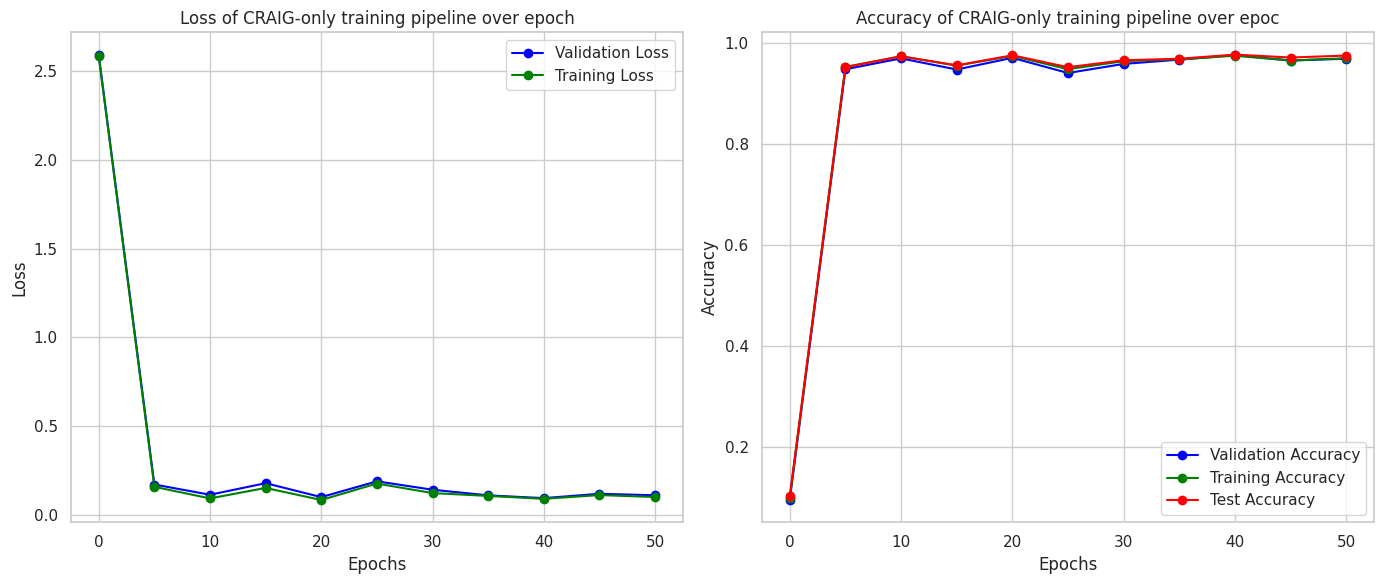

In [ ]:
import re
import matplotlib.pyplot as plt

# Regular expression to extract the relevant data for each epoch
log_pattern = re.compile(r"Epoch: (\d+)\s*,\s*Val loss: ([\d.]+)\s*,\s*Val acc: ([\d.]+)\s*,\s*Tst loss: ([\d.]+)\s*,\s*Tst acc: ([\d.]+)\s*,\s*Trn loss: ([\d.]+)\s*,\s*Trn acc: ([\d.]+)")

# File path to the log file
log_file_path = '/content/drive/MyDrive/260/Logs/results_craig200.log'  # Change this to your log file's path

# Lists to store the extracted data
epochs = []
val_losses = []
val_accuracies = []
tst_losses = []
tst_accuracies = []
trn_losses = []
trn_accuracies = []

# Open and read the log file
with open(log_file_path, 'r') as file:
    for line in file:
        match = log_pattern.search(line)
        if match:
            epoch = int(match.group(1))
            # Stop processing after 50 epochs
            if epoch > 50:
                break

            val_loss = float(match.group(2))
            val_acc = float(match.group(3))
            tst_loss = float(match.group(4))
            tst_acc = float(match.group(5))
            trn_loss = float(match.group(6))
            trn_acc = float(match.group(7))

            # Append values to respective lists
            epochs.append(epoch)
            val_losses.append(val_loss)
            val_accuracies.append(val_acc)
            tst_losses.append(tst_loss)
            tst_accuracies.append(tst_acc)
            trn_losses.append(trn_loss)
            trn_accuracies.append(trn_acc)

# Plotting the data for the first 50 epochs

# Create a figure with two subplots: one for loss and one for accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Losses
ax1.plot(epochs, val_losses, label='Validation Loss', color='blue', marker='o')
ax1.plot(epochs, trn_losses, label='Training Loss', color='green', marker='o')
# ax1.plot(epochs, tst_losses, label='Test Loss', color='red', marker='o')
ax1.set_title('Loss of CRAIG-only training pipeline over epoch')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot Accuracies
ax2.plot(epochs, val_accuracies, label='Validation Accuracy', color='blue', marker='o')
ax2.plot(epochs, trn_accuracies, label='Training Accuracy', color='green', marker='o')
ax2.plot(epochs, tst_accuracies, label='Test Accuracy', color='red', marker='o')
ax2.set_title('Accuracy of CRAIG-only training pipeline over epoc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


### b. PCA of the coreset across different classes of MNIST

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


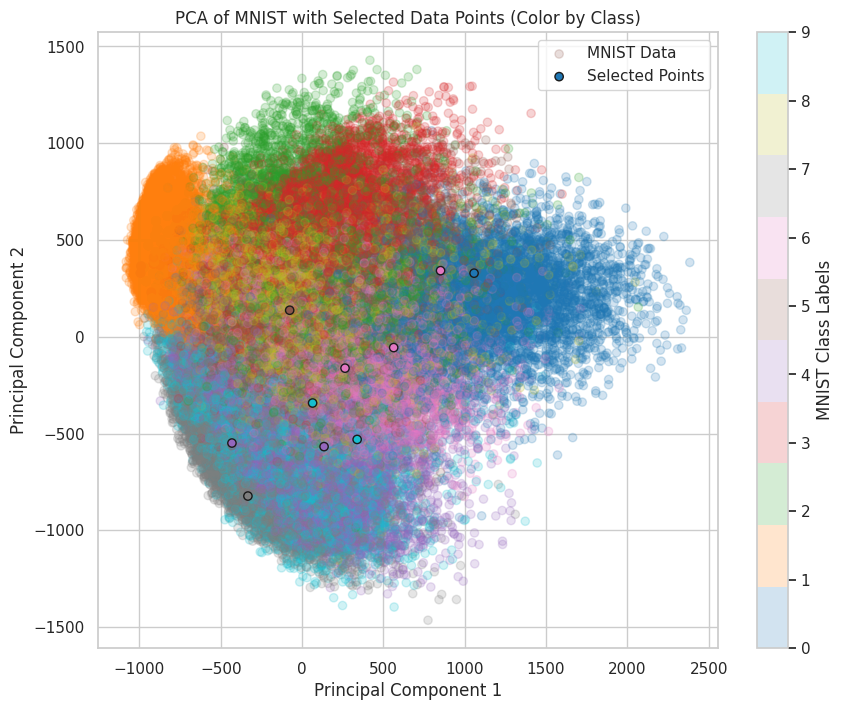

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import re
from matplotlib.colors import ListedColormap

# Step 1: Load the MNIST dataset using fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data  # 70000 x 784 matrix
y = mnist.target.astype(int)  # Labels for the dataset

# Step 2: Apply PCA to reduce MNIST data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Read the log file and extract the selected indices
log_file = '/content/drive/MyDrive/260/Logs/results_craig200.log'
selected_indices = {}

with open(log_file, 'r') as file:
    lines = file.readlines()
    for i, line in enumerate(lines):
        if 'Selected Indices:' in line:
            indices_line = lines[i + 1].strip()  # Get the line with the indices
            cleaned_indices_line = re.sub(r'[{}]', '', indices_line)  # Remove curly braces
            index_parts = cleaned_indices_line.split(',')
            for part in index_parts:
                key_value = part.split(':')
                if len(key_value) == 2:
                    key = int(key_value[0].strip())
                    values = [int(v.strip()) for v in key_value[1].strip().strip('[]').split()]
                    selected_indices[key] = values

# Step 4: Extract data points and labels based on the selected indices
selected_data = []
selected_labels = []
for key in selected_indices:
    selected_data.extend([X.iloc[i].values for i in selected_indices[key]])
    selected_labels.extend([y[i] for i in selected_indices[key]])

selected_data = np.array(selected_data)
selected_labels = np.array(selected_labels)

# Step 5: Apply PCA to the selected data to project it onto 2D
selected_data_pca = pca.transform(selected_data)

# Step 6: Visualize the entire MNIST data (PCA) with the selected points overlayed using color gradients
plt.figure(figsize=(10, 8))

# Define a colormap for the MNIST classes (10 classes)
cmap = plt.get_cmap('tab10', 10)

# Plot the entire MNIST dataset in PCA space with color gradient based on class
# Plot the entire MNIST dataset in PCA space with lower opacity
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, alpha=0.2, label='MNIST Data')

# Overlay the selected points in the PCA space with their respective class colors
plt.scatter(selected_data_pca[:, 0], selected_data_pca[:, 1], c=selected_labels, cmap=cmap, edgecolors='k', label='Selected Points')

# Add colorbar to represent class labels
cbar = plt.colorbar(scatter, ticks=range(10))
cbar.ax.set_yticklabels(range(10))
cbar.set_label('MNIST Class Labels')

# Optional: Add axis labels, title, and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of MNIST with Selected Data Points (Color by Class)')
plt.legend(loc='upper right')

# Show the plot
plt.show()


In [ ]:
test_acc = [0.1032 , 0.9518 , 0.9733 , 0.9555 , 0.9753 , 0.9518 , 0.9655 , 0.9685 , 0.9767 , 0.9709 , 0.9748 , 0.9504 , 0.9743 , 0.9405 , 0.9789 , 0.9836 , 0.9801 , 0.9599 , 0.9852 , 0.9595 , 0.9822 , 0.9669 , 0.9873 , 0.9877 , 0.9848 , 0.9777 , 0.9879 , 0.9874 , 0.9889 , 0.9838 , 0.9875 , 0.9887 , 0.9879 , 0.9892 , 0.9897 , 0.9894 , 0.9899 , 0.9902 , 0.9913 , 0.991 , 0.9904]
sum(test_acc) / len(test_acc)

0.9560853658536586

### c. Performance of 2-layer CNN across epoch

Epochs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Validation Loss: [2.435960723876953, 0.2895759286880493, 0.2907285623550415, 0.2680847555796305, 0.30033111159006753, 2.318287363688151, 2.313792475382487, 2.32141259765625, 2.319309275309245, nan, nan]
Validation Accuracy: [0.16066666666666668, 0.9121666666666667, 0.9081666666666667, 0.9158333333333334, 0.9073333333333333, 0.09933333333333333, 0.111, 0.111, 0.111, 0.09716666666666667, 0.09716666666666667]
Test Loss: [2.44135525226593, 0.2621964171528816, 0.25902900397777556, 0.24004064723849297, 0.2684056207537651, 2.312520146369934, 2.3082735776901244, 2.312403416633606, 2.3138661623001098, nan, nan]
Test Accuracy: [0.153, 0.9197, 0.9156, 0.9265, 0.9161, 0.0982, 0.1135, 0.1135, 0.1135, 0.098, 0.098]
Training Loss: [2.437018620243779, 0.26658947139316136, 0.2618693863374216, 0.24619273602520977, 0.2793392128061365, 2.3134883309823495, 2.3094226198549626, 2.3144601033528645, 2.3150182506419994, nan, nan]
Training Accuracy: [0.1520925925925925

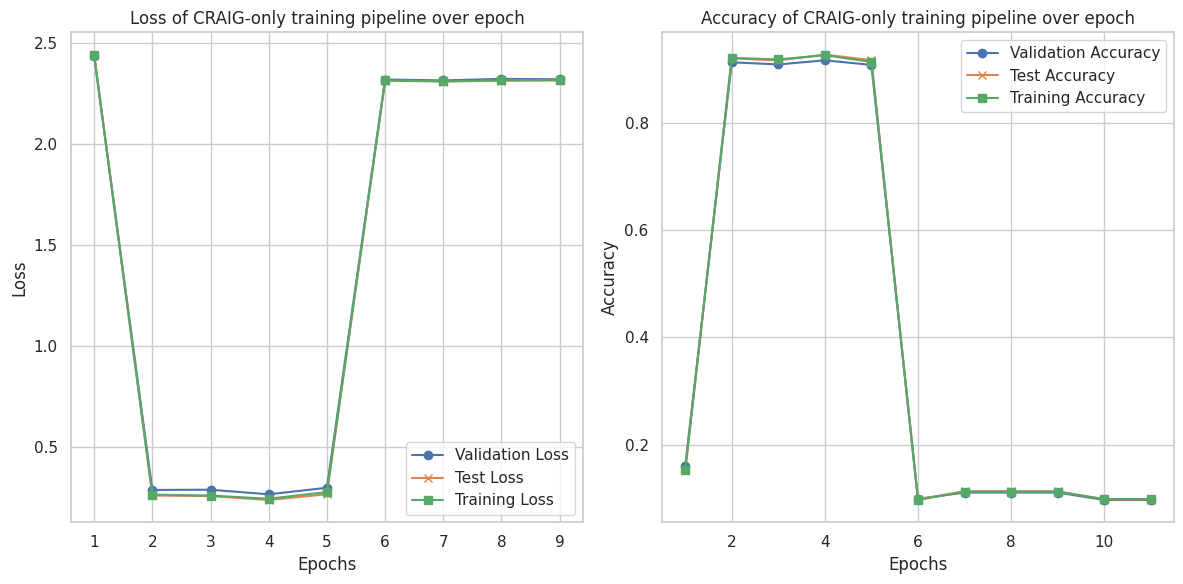

In [ ]:
import json
import matplotlib.pyplot as plt

# Define a function to parse the JSON file
def parse_json_file(file_path):
    with open(file_path, 'r') as file:
        # Load the JSON data from the file
        data = json.load(file)

    # Extract data from the JSON structure
    epochs = list(range(1, len(data['val_loss']) + 1))  # Assuming the lists are all the same length
    val_loss = data['val_loss']
    val_acc = data['val_acc']
    tst_loss = data['tst_loss']
    tst_acc = data['tst_acc']
    trn_loss = data['trn_loss']
    trn_acc = data['trn_acc']

    # Debugging: print the data to check if it's being parsed correctly
    print("Epochs:", epochs)
    print("Validation Loss:", val_loss)
    print("Validation Accuracy:", val_acc)
    print("Test Loss:", tst_loss)
    print("Test Accuracy:", tst_acc)
    print("Training Loss:", trn_loss)
    print("Training Accuracy:", trn_acc)

    return epochs, val_loss, val_acc, tst_loss, tst_acc, trn_loss, trn_acc

# Replace with the path to your JSON file
json_file_path = '/content/drive/MyDrive/260/Logs/metric_CRAIGonly_e50_f0.6_cnn.json'

# Parse the JSON file
epochs, val_loss, val_acc, tst_loss, tst_acc, trn_loss, trn_acc = parse_json_file(json_file_path)

# Check if the lists contain any data
if len(epochs) == 0:
    print("No data parsed. Please check the JSON format.")
else:
    # Plotting results
    plt.figure(figsize=(12, 6))

    # Subplot for Losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.plot(epochs, tst_loss, label='Test Loss', marker='x')
    plt.plot(epochs, trn_loss, label='Training Loss', marker='s')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss of CRAIG-only training pipeline over epoch')
    plt.legend()

    # Subplot for Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.plot(epochs, tst_acc, label='Test Accuracy', marker='x')
    plt.plot(epochs, trn_acc, label='Training Accuracy', marker='s')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of CRAIG-only training pipeline over epoch')
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()


## 2. DP-only
The performance across different noise setting

<ipython-input-11-7c55532de74f>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sigmas, y=accuracies, palette='viridis', ax=ax[1])


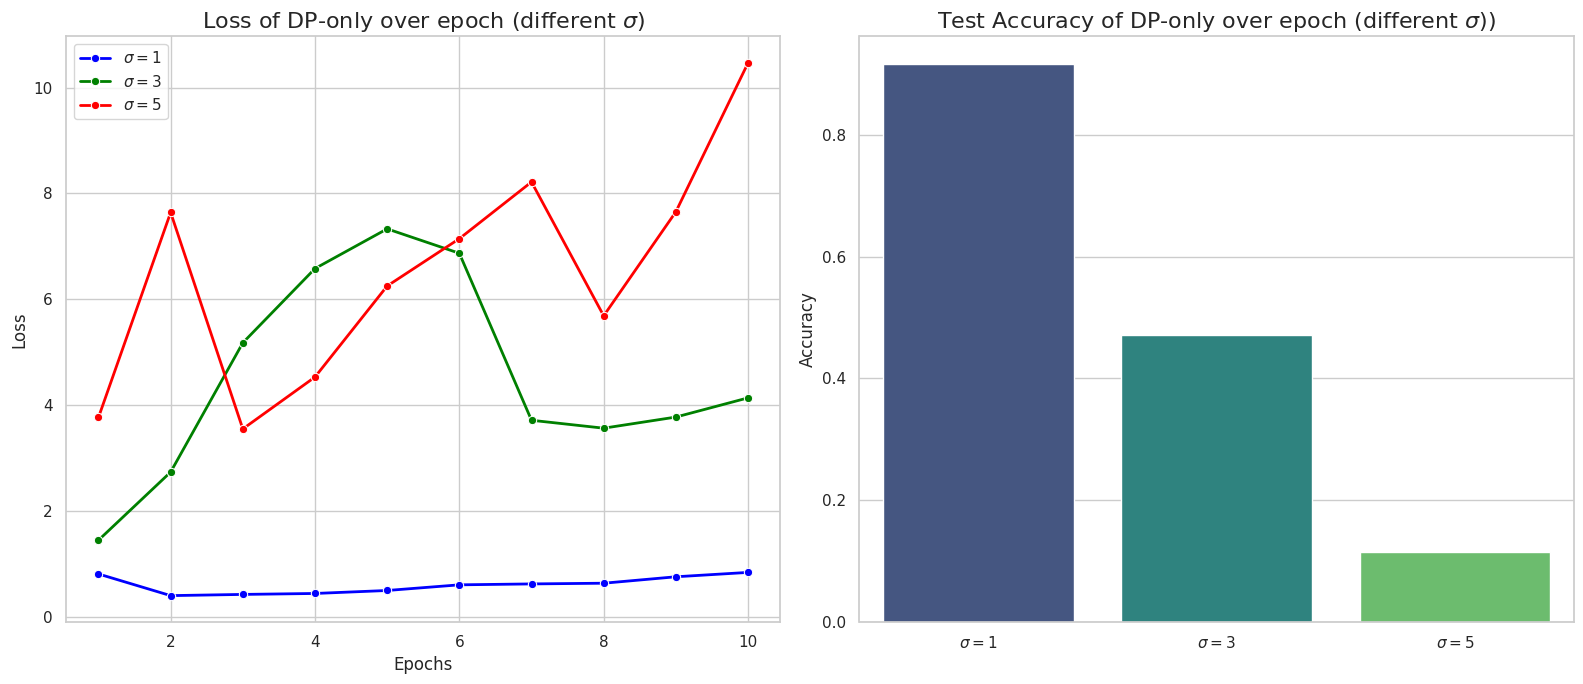

In [ ]:
# Data for each sigma (Loss for 10 epochs)
sigma_1_epochs = np.arange(1, 11)
sigma_1_losses = [0.816448, 0.407817, 0.430425, 0.448411, 0.504690, 0.611420, 0.628653, 0.641932, 0.763548, 0.845930]
sigma_1_accuracy = 91.56 / 100  # Accuracy from the log, converted to range [0, 1]

sigma_3_epochs = np.arange(1, 11)
sigma_3_losses = [1.454017, 2.740506, 5.180548, 6.582781, 7.331970, 6.870906, 3.718251, 3.568764, 3.778721, 4.141168]
sigma_3_accuracy = 47.18 / 100  # Accuracy from the log, converted to range [0, 1]

sigma_5_epochs = np.arange(1, 11)
sigma_5_losses = [3.772029, 7.641666, 3.554675, 4.534762, 6.253127, 7.146331, 8.217284, 5.690191, 7.653624, 10.463842]
sigma_5_accuracy = 11.48 / 100  # Accuracy from the log, converted to range [0, 1]

# Set the seaborn style for better visuals
sns.set(style="whitegrid")

# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 7))

# Plot Loss vs Epoch for different Sigma values
sns.lineplot(x=sigma_1_epochs, y=sigma_1_losses, label=r'$\sigma = 1$', ax=ax[0], color='blue', marker='o', linewidth=2)
sns.lineplot(x=sigma_3_epochs, y=sigma_3_losses, label=r'$\sigma = 3$', ax=ax[0], color='green', marker='o', linewidth=2)
sns.lineplot(x=sigma_5_epochs, y=sigma_5_losses, label=r'$\sigma = 5$', ax=ax[0], color='red', marker='o', linewidth=2)

# Set titles and labels for Loss plot
ax[0].set_title('Loss of DP-only over epoch (different $\sigma$)', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=12)
ax[0].set_ylabel('Loss', fontsize=12)
ax[0].legend()

# Plot Accuracy vs Sigma (at the final epoch, or overall)
accuracies = [sigma_1_accuracy, sigma_3_accuracy, sigma_5_accuracy]
sigmas = [r'$\sigma = 1$', r'$\sigma = 3$', r'$\sigma = 5$']

sns.barplot(x=sigmas, y=accuracies, palette='viridis', ax=ax[1])

# Set titles and labels for Accuracy plot
ax[1].set_title('Test Accuracy of DP-only over epoch (different $\sigma$))', fontsize=16)
ax[1].set_ylabel('Accuracy', fontsize=12)

# Adjust the layout
plt.tight_layout()
plt.show()